In [2]:
# Michaela Webster's Thesis Project #
""" This project aims to try to predict the outcome of security clearance appeals cases """

#use this link for scikit learn help: https://www.ritchieng.com/pandas-scikit-learn/

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# imports
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
import subprocess
import shlex

In [24]:
#open drugs_query.csv as pandas dataframe - encoding must be latin-1
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\drugs_query.csv"
data = pd.read_csv(path_to_file, encoding='latin-1')

df = data.groupby(['Drugs', 'Denied']).size()
#print bar graph of drugs yes/no vs denied yes/no
print (df)

Drugs  Denied
False  False     8785
       True      9518
True   False      867
       True      1344
dtype: int64


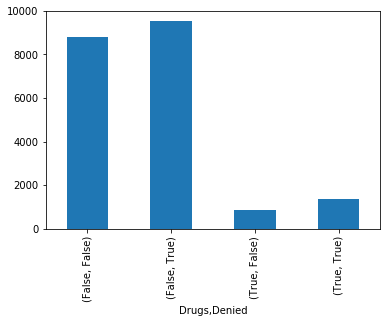

In [25]:
#print bar graph to show drugs/denied
#cannot do this through cmd
df.plot.bar()

marijuana:  1431
meth:  44
cocaine:  125
heroin:  8


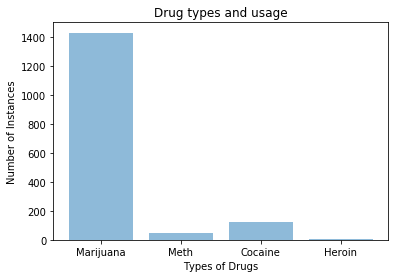

In [47]:
#print out the count for drug types
data.Judgment.head(3)
#sort through the judgment field
marijuana = 0
cocaine = 0
meth = 0
heroin = 0

#go through each row 
for i in data['Judgment']:
        if 'marijuana' in i :
            marijuana = marijuana+1
        elif 'meth' in i:
            meth = meth+1
        elif 'cocaine' in i:
            cocaine = cocaine+1
        elif 'heroin' in i:
            heroin = heroin+1
            
print('marijuana: ', marijuana)
print('meth: ', meth)
print('cocaine: ', cocaine)
print('heroin: ', heroin)

x=['Marijuana', 'Meth', 'Cocaine', 'Heroin']
y=[marijuana,meth,cocaine,heroin]

plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x)
plt.xlabel('Types of Drugs')
plt.ylabel('Number of Instances')
plt.title('Drug types and usage')
 
plt.show()

In [32]:
# set the featured columns for X (Drugs)
feature_cols = ['Drugs']
# you want all rows, and the feature_cols' columns
X = data.loc[:, feature_cols]
# now we want to create our response vector
y = data.Denied

In [33]:
# START DOING MACHINE LEARNING STUFF
# 1. import
from sklearn.linear_model import LogisticRegression
# 2. instantiate model
logreg = LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')
# 3. fit 
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=110, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
# FOR TEST DATA
#open drugs_test.csv as pandas dataframe
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\drugs_test.csv"
data2 = pd.read_csv(path_to_file, encoding='latin-1')
X_new = data.loc[:, feature_cols]
new_pred_class = logreg.predict(X_new)

In [35]:
#SAVE DATAFRAME TO CSV
# pandas would align them next to each other
# to ensure the first column is Drugs, use .set_index
#drug_data = pd.DataFrame({'Drugs':test.Drugs, 'Denied':new_pred_class}).set_index('Drugs')
#drug_data.to_csv('drug_df.csv')